In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
sns.set()
from subprocess import check_output

In [2]:
auto_data = pd.read_csv("Automobiledata_cleaned.csv")
auto_data = pd.DataFrame(auto_data)

In [3]:
auto_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'num_cylinders', 'num_doors', 'Area',
       'engine_size_cc', 'hp2cw_ratio', 'risk_analysis', 'risky'],
      dtype='object')

In [14]:
title_color = "#333333"
plot_color = "cyan"
y_title_margin = 1.0
palette = ["#FF0000","#ff8800"]
plot_alt_color = "coral"
plot_color_secondary = "deepskyblue"
#fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects for a 3x2 subplot figure

#### Checking the distribution of engine parameters

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


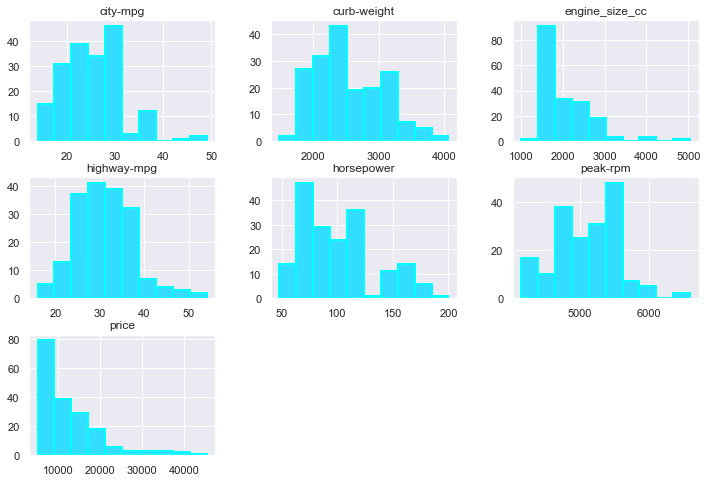

In [10]:
fig, ax = plt.subplots(figsize=(12,8), ncols=1, nrows=1)
fig.patch.set_alpha(.7)

auto_data[['engine_size_cc','peak-rpm','curb-weight','horsepower', 'city-mpg', 'highway-mpg','price']].hist(color='#33ddff', ax=ax, edgecolor=plot_color, linewidth=2)
plt.show()

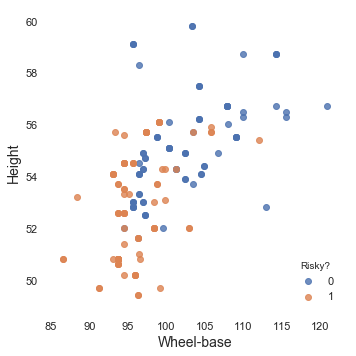

In [11]:
plotAutoData=sns.lmplot('wheel-base', 'height', data=auto_data, fit_reg=False, hue="risky", legend=False)

plotAutoData.facet_axis(0,0).patch.set_alpha(0)
plotAutoData.fig.patch.set_alpha(0.5)

plotAutoData.set_ylabels('Height',fontsize=14 )
plotAutoData.set_xlabels('Wheel-base',fontsize=14)
plotAutoData.facet_axis(0,0).legend(loc="lower right",framealpha=0, title="Risky?")

Text(0.5, 0, 'Symboling - Insurance Risk Factor')

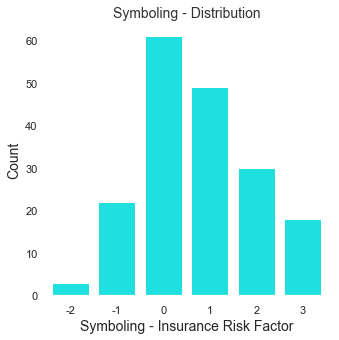

In [8]:
title_color = "#333333"
plot_color = "cyan"
y_title_margin = 1.0
palette = ["#FF0000","#ff8800"]
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects for a 3x2 subplot figure

fig.patch.set_alpha(0.5)
ax.set_title("Symboling - Distribution", y = y_title_margin, color=title_color,fontsize=14)
ax.patch.set_alpha(0)

symbol_hist=sns.countplot(auto_data["symboling"], color=plot_color, ax=ax )
symbol_hist.set_ylabel('Count',fontsize=14 )
symbol_hist.set_xlabel('Symboling - Insurance Risk Factor',fontsize=14)

Text(0.5, 0, 'Symboling')

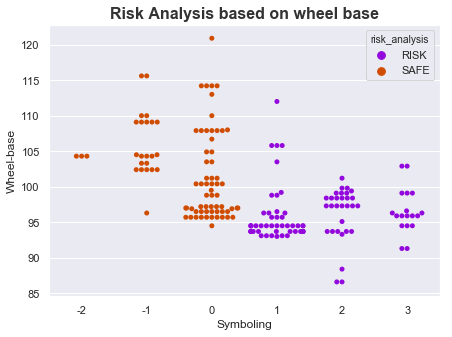

In [12]:
fig, ax = plt.subplots(figsize=(7,5), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Risk Analysis based on wheel base", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")

col_dist = sns.swarmplot(x="symboling", y="wheel-base", hue="risk_analysis", ax=ax, palette="gnuplot", data=auto_data)

col_dist.set_ylabel('Wheel-base', fontsize=12 )
col_dist.set_xlabel('Symboling', fontsize=12)

Text(0.5, 0, 'Body style')

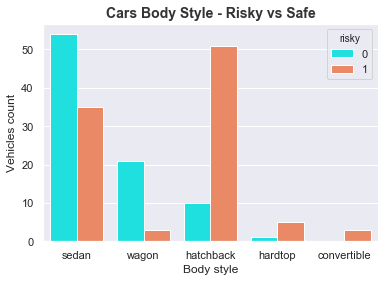

In [15]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Cars Body Style - Risky vs Safe", y = y_title_margin, color=title_color, fontsize=14, fontweight="bold")
autoDatacolDist = sns.countplot(data=auto_data, x="body-style", hue="risky", ax=ax, palette=[plot_color, plot_alt_color])

autoDatacolDist.set_ylabel('Vehicles count', fontsize=12 )
autoDatacolDist.set_xlabel('Body style', fontsize=12)

In [16]:
autoDataCars = pd.pivot_table(auto_data,index=['body-style','risk_analysis'], values='risky',  aggfunc='count').sort_values(by=['risky'], ascending=False)
autoDataCars.reset_index(inplace=True)
autoDataCars

,body-style,risk_analysis,risky
0,sedan,SAFE,54
1,hatchback,RISK,51
2,sedan,RISK,35
3,wagon,SAFE,21
4,hatchback,SAFE,10
5,hardtop,RISK,5
6,convertible,RISK,3
7,wagon,RISK,3
8,hardtop,SAFE,1


In [17]:
auto_data[auto_data['risk_analysis'] == "SAFE"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,num_cylinders,num_doors,Area,engine_size_cc,hp2cw_ratio,risk_analysis,risky
6,0,161.000000,audi,gas,turbo,two,hatchback,Four Wheel Drive,front,99.5,...,16,22,17859.166667,5,2,629188.560,2146,0.052407,SAFE,0
8,0,192.000000,bmw,gas,std,four,sedan,Rear Wheel Drive,front,101.2,...,23,29,16925.000000,4,4,622095.552,1769,0.042171,SAFE,0
9,0,188.000000,bmw,gas,std,two,sedan,Rear Wheel Drive,front,101.2,...,21,28,20970.000000,6,2,622095.552,2687,0.044649,SAFE,0
10,0,188.000000,bmw,gas,std,four,sedan,Rear Wheel Drive,front,101.2,...,21,28,21105.000000,6,4,622095.552,2687,0.043761,SAFE,0
12,0,190.000000,bmw,gas,std,four,sedan,Rear Wheel Drive,front,103.5,...,16,22,30760.000000,6,4,704276.370,3424,0.056347,SAFE,0
13,0,190.000000,bmw,gas,std,two,sedan,Rear Wheel Drive,front,103.5,...,16,22,41315.000000,6,2,706639.374,3424,0.053846,SAFE,0
14,0,190.000000,bmw,gas,std,four,sedan,Rear Wheel Drive,front,110.0,...,15,20,36880.000000,6,4,786358.990,3424,0.051926,SAFE,0
17,0,81.000000,chevrolet,gas,std,four,sedan,Front Wheel Drive,front,94.5,...,38,43,6575.000000,4,4,525183.360,1474,0.036668,SAFE,0
24,-1,110.000000,dodge,gas,std,four,wagon,Front Wheel Drive,front,103.3,...,24,30,8921.000000,4,4,674493.768,1999,0.034714,SAFE,0
31,0,110.000000,honda,gas,std,four,sedan,Front Wheel Drive,front,96.5,...,30,34,7295.000000,4,4,569939.200,1507,0.037811,SAFE,0


[Text(0, 0, 'sedan'),
 Text(0, 0, 'wagon'),
 Text(0, 0, 'hatchback'),
 Text(0, 0, 'hardtop'),
 Text(0, 0, 'convertible')]

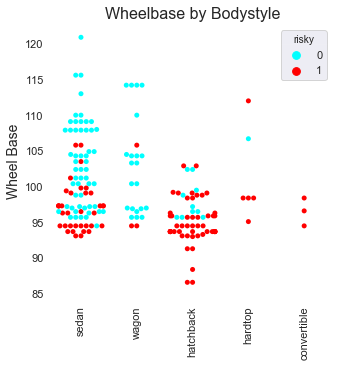

In [18]:
palette=["cyan","#FF0000"]
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Wheelbase by Bodystyle", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
plotAutoData=sns.swarmplot(x="body-style",y="wheel-base",hue="risky",data=auto_data,palette=palette)
plotAutoData.set_ylabel('Wheel Base',fontsize=14 )
plotAutoData.set_xlabel('',fontsize=14)
plotAutoData.set_xticklabels(plotAutoData.get_xticklabels(), rotation=90)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


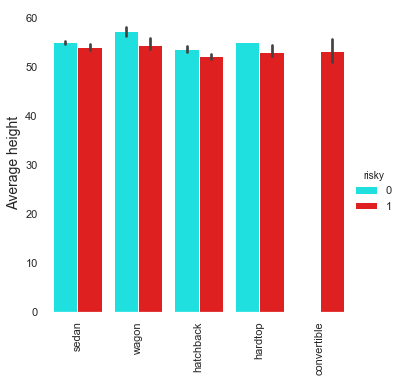

In [19]:
autoDatabhr=sns.factorplot(x="body-style",y="height", data=auto_data,kind="bar",hue="risky", palette=palette)
autoDatabhr.set_titles('Average height Vs body style')
autoDatabhr.set_xlabels('', fontsize=14)
autoDatabhr.set_ylabels('Average height', fontsize=14)
autoDatabhr.ax.set_xticklabels(autoDatabhr.ax.get_xticklabels(), rotation=90)

autoDatabhr.ax.patch.set_alpha(0)
autoDatabhr.fig.patch.set_alpha(0.5)
plt.show()

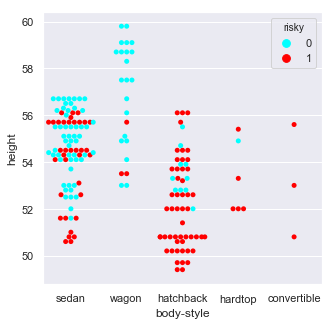

In [20]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1)
sns.swarmplot(x="body-style",y="height",hue="risky",data=auto_data,palette=palette)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


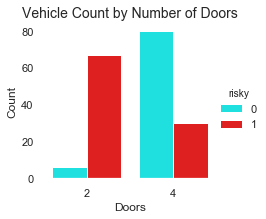

In [21]:
autoDatadr=sns.factorplot(x="num_doors", data=auto_data, hue="risky", kind="count", size=3, palette=palette )
autoDatadr.axes[0,0].set_title("Vehicle Count by Number of Doors", fontsize=14)
autoDatadr.axes[0,0].set_ylabel("Count", fontsize=12)
autoDatadr.axes[0,0].set_xlabel("Doors", fontsize=12)
autoDatadr.axes[0,0].patch.set_alpha(0)
autoDatadr.fig.patch.set_alpha(0.5)

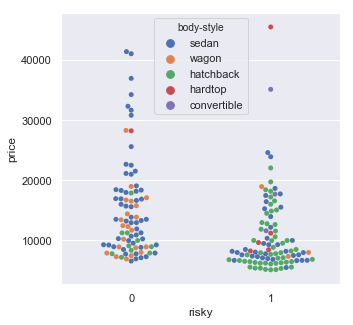

In [22]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1)
sns.swarmplot(x="risky",y="price",data=auto_data, hue="body-style")

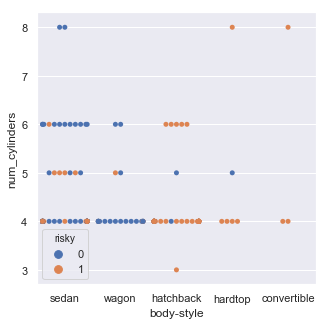

In [23]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1)
sns.swarmplot(x="body-style",y="num_cylinders",data=auto_data, hue="risky")

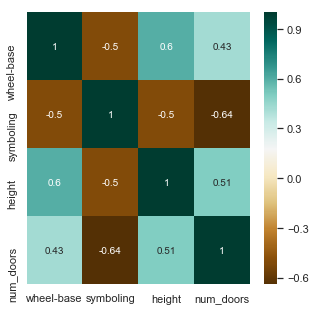

In [24]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1)
sns.heatmap(auto_data[['wheel-base','symboling','height', 'num_doors']].corr(),cmap="BrBG",annot=True)

Text(0.5, 0, 'Wheelbase')

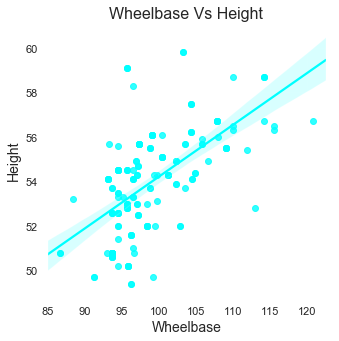

In [25]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) 
ax.set_title("Wheelbase Vs Height", fontsize=16)
fig.patch.set_alpha(0.5)
ax.patch.set_alpha(0)

gax=sns.regplot(x='wheel-base', y='height', data=auto_data, color=plot_color)
gax.set_ylabel('Height', fontsize=14)
gax.set_xlabel('Wheelbase',fontsize=14)

In [26]:
auto_data['power2weight'] = (auto_data['horsepower']/0.001341) / auto_data['curb-weight']

In [27]:
auto_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'num_cylinders', 'num_doors', 'Area',
       'engine_size_cc', 'hp2cw_ratio', 'risk_analysis', 'risky',
       'power2weight'],
      dtype='object')

In [28]:
autoDataVariables=auto_data.groupby(by='symboling',as_index=False)['wheel-base','height','power2weight','horsepower','Area'].mean()
autoDataVariables = autoDataVariables.melt('symboling',var_name='cols',  value_name='vals')

autoDatadoors = auto_data.groupby('symboling')['num_doors'].apply(lambda sym: stats.mode(sym)[0][0]).reset_index()
autoDatadoors.columns=['symboling','vals']
autoDatadoors['cols'] = 'num_doors'

autoDataVariables=autoDataVariables.append(autoDatadoors[['symboling','cols','vals']], ignore_index=False, verify_integrity=False)
autoDataVariables.reset_index(drop=True, inplace=True)
autoDataVariables['vals'] = np.log(autoDataVariables['vals'])

autoDataVariables

,symboling,cols,vals
0,-2,wheel-base,4.647271
1,-1,wheel-base,4.664082
2,0,wheel-base,4.617601
3,1,wheel-base,4.562540
4,2,wheel-base,4.566949
5,3,wheel-base,4.570061
6,-2,height,4.028917
7,-1,height,4.023646
8,0,height,4.006856
9,1,height,3.968210


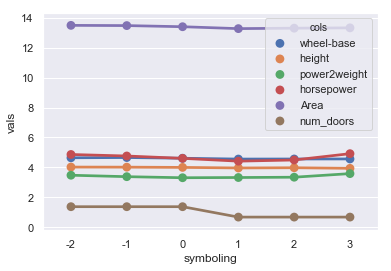

In [29]:
sns.pointplot(x='symboling', y='vals', hue='cols',data=autoDataVariables)